Time elapsed is 27.756776 seconds


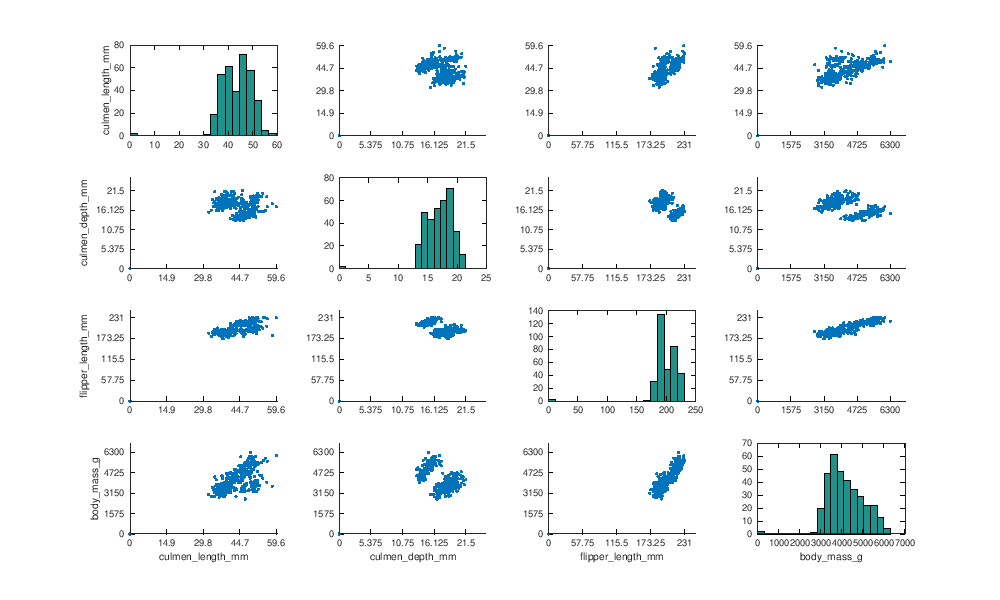

In [2]:
% Start the timer
tic;

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Load the dataset
data = csvread("data/penguins.csv", 1, 0);

% Extract columns 3 to 6
numeric_data = data(:, 3:6);

% Remove rows with missing values
numeric_data = numeric_data(all(~isnan(numeric_data), 2), :);

% Column labels
column_labels = {'culmen\\_length\\_mm', 'culmen\\_depth\\_mm', 'flipper\\_length\\_mm', 'body\\_mass\\_g'};

% Get the number of variables (columns)
num_vars = size(numeric_data, 2);

% Create a new figure with a larger size
figure('Position', [0, 0, 1000, 600]);
for i = 1:num_vars
    for j = 1:num_vars
        subplot(num_vars, num_vars, (i-1)*num_vars + j);
        if i == j
            hist(numeric_data(:, i), 20); % Adjust the number of bins if needed
            set(gca, 'FontSize', 4);
        else
            scatter(numeric_data(:, j), numeric_data(:, i), '.');
            set(gca, 'FontSize', 4); % Set font size for axes
            % Reduce the number of ticks
            set(gca, 'XTick', linspace(min(numeric_data(:, j)), max(numeric_data(:, j)), 5));
            set(gca, 'YTick', linspace(min(numeric_data(:, i)), max(numeric_data(:, i)), 5));
        end
        if i == 4
            xlabel(column_labels{j}, 'FontSize', 4);  % Use column labels for x-axis with smaller font size
        else
            xlabel('');  % Empty label for other subplots
        end
        if j == 1
            ylabel(column_labels{i}, 'FontSize', 4);  % Use column labels for y-axis with smaller font size
        else
            ylabel('');  % Empty label for other subplots
        end
    end
end

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);